In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

fwave = r.TFile("./data/waveforms.root")
twave = fwave.Get("islands").Get("islands").Get("islandTree")

In [3]:
from evwTools import *

Unique island:  1636400282000020001100079
     Found another island with this unique ID. Adding their crystals together:
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
     Found Match ( 1000 0 1 )
         East:  [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
         West:  [35.0]


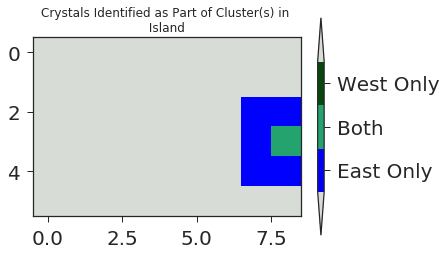

Unique island:  1636400282000020001100088
     Found another island with this unique ID. Adding their crystals together:
           [12.0, 13.0, 14.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
           [12.0, 13.0, 14.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0, 12.0, 13.0, 14.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
     Found Match ( 1001 0 1 )
         East:  [12.0, 13.0, 14.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0, 12.0, 13.0, 14.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
         West:  [33.0, 13.0, 22.0, 32.0]


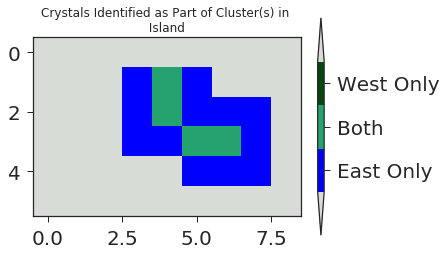

Unique island:  1636400282000020001100094
     Found another island with this unique ID. Adding their crystals together:
           [13.0, 14.0, 15.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0]
           [13.0, 14.0, 15.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0, 13.0, 14.0, 15.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0]
     Found Match ( 1002 0 1 )
         East:  [13.0, 14.0, 15.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0, 13.0, 14.0, 15.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0]
         West:  [23.0, 14.0, 22.0, 13.0]


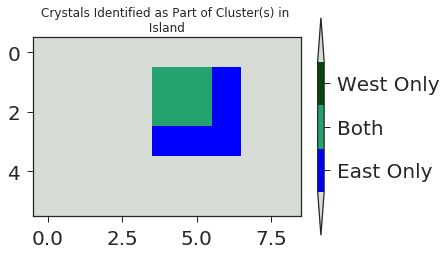

Unique island:  1636400282000020001100092
     Found another island with this unique ID. Adding their crystals together:
           [7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
           [7.0, 8.0, 16.0, 17.0, 25.0, 26.0, 7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
     Found Match ( 1003 0 1 )
         East:  [7.0, 8.0, 16.0, 17.0, 25.0, 26.0, 7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
         West:  [16.0, 17.0]


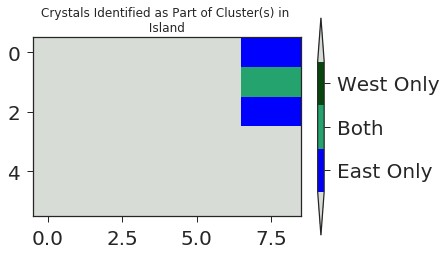

Unique island:  1636400282000020001100082
     Found another island with this unique ID. Adding their crystals together:
           [18.0, 19.0, 27.0, 28.0, 36.0, 37.0]
           [18.0, 19.0, 27.0, 28.0, 36.0, 37.0, 18.0, 19.0, 27.0, 28.0, 36.0, 37.0]
     Found Match ( 1004 0 1 )
         East:  [18.0, 19.0, 27.0, 28.0, 36.0, 37.0, 18.0, 19.0, 27.0, 28.0, 36.0, 37.0]
         West:  [27.0, 18.0, 28.0]


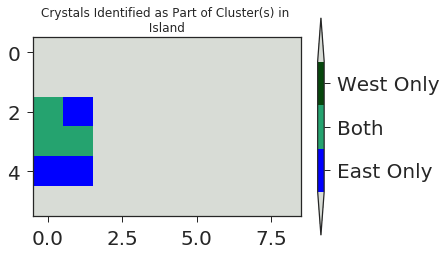

Unique island:  1636400282000020001100089
     Found another island with this unique ID. Adding their crystals together:
           [22.0, 23.0, 24.0, 25.0, 26.0, 31.0, 32.0, 33.0, 34.0, 35.0, 40.0, 41.0, 42.0, 43.0, 44.0]
           [22.0, 23.0, 24.0, 25.0, 26.0, 31.0, 32.0, 33.0, 34.0, 35.0, 40.0, 41.0, 42.0, 43.0, 44.0, 22.0, 23.0, 24.0, 25.0, 26.0, 31.0, 32.0, 33.0, 34.0, 35.0, 40.0, 41.0, 42.0, 43.0, 44.0]
     Found Match ( 1005 0 1 )
         East:  [22.0, 23.0, 24.0, 25.0, 26.0, 31.0, 32.0, 33.0, 34.0, 35.0, 40.0, 41.0, 42.0, 43.0, 44.0, 22.0, 23.0, 24.0, 25.0, 26.0, 31.0, 32.0, 33.0, 34.0, 35.0, 40.0, 41.0, 42.0, 43.0, 44.0]
         West:  [34.0, 33.0, 32.0]


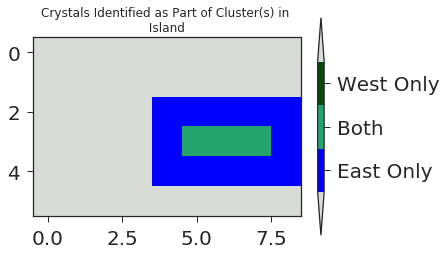

Unique island:  1636400282000020001100093
     Found another island with this unique ID. Adding their crystals together:
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
     Found another island with this unique ID. Adding their crystals together:
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0]
     Found Match ( 1006 0 1 )
         East:  [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0]
         West:  [26.0, 34.0, 25.0, 19.0, 20.0, 33.0, 18.0, 27.0]


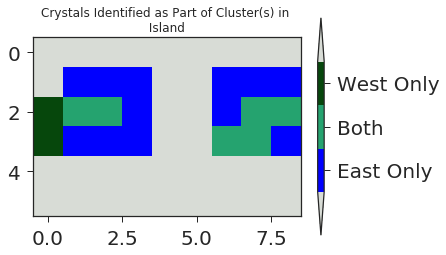

Unique island:  1636400282000020001100097
     Found another island with this unique ID. Adding their crystals together:
           [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
           [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0, 5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
     Found Match ( 1008 0 1 )
         East:  [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0, 5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
         West:  [6.0, 24.0, 15.0, 16.0]


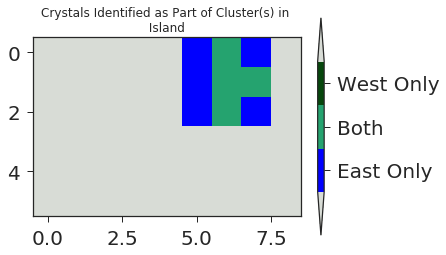

Unique island:  1636400282000020001100095
     Found another island with this unique ID. Adding their crystals together:
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
     Found Match ( 1009 0 1 )
         East:  [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
         West:  [34.0, 25.0, 35.0]


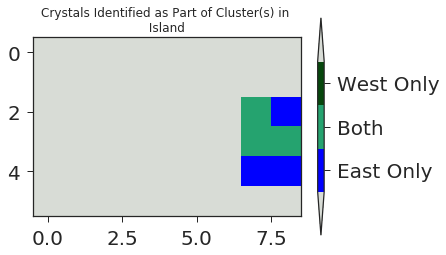

Unique island:  1636400282000020001100096
     Found another island with this unique ID. Adding their crystals together:
           [6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0]
           [6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0]
     Found Match ( 1010 0 1 )
         East:  [6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0]
         West:  [16.0, 15.0]


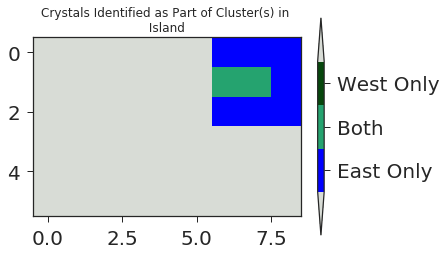

Unique island:  1636400282000020001100099
     Found another island with this unique ID. Adding their crystals together:
           [2.0, 3.0, 4.0, 11.0, 12.0, 13.0, 20.0, 21.0, 22.0]
           [2.0, 3.0, 4.0, 11.0, 12.0, 13.0, 20.0, 21.0, 22.0, 2.0, 3.0, 4.0, 11.0, 12.0, 13.0, 20.0, 21.0, 22.0]
     Found Match ( 1011 0 1 )
         East:  [2.0, 3.0, 4.0, 11.0, 12.0, 13.0, 20.0, 21.0, 22.0, 2.0, 3.0, 4.0, 11.0, 12.0, 13.0, 20.0, 21.0, 22.0]
         West:  [23.0, 31.0, 16.0, 13.0, 12.0]


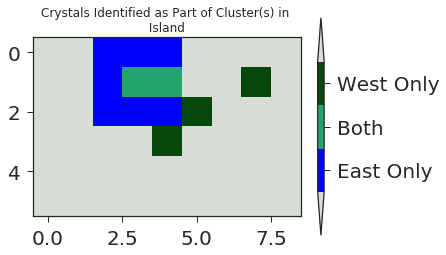

Unique island:  1636400282000020001100098
     Found another island with this unique ID. Adding their crystals together:
           [6.0, 7.0, 8.0, 15.0, 16.0, 17.0]
           [6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 6.0, 7.0, 8.0, 15.0, 16.0, 17.0]
     Found Match ( 1012 0 1 )
         East:  [6.0, 7.0, 8.0, 15.0, 16.0, 17.0, 6.0, 7.0, 8.0, 15.0, 16.0, 17.0]
         West:  [6.0, 7.0]


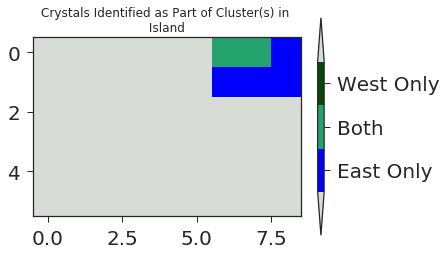

Unique island:  1636400282000020001100101
     Found another island with this unique ID. Adding their crystals together:
           [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
           [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
     Found Match ( 1013 0 1 )
         East:  [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
         West:  [34.0, 35.0]


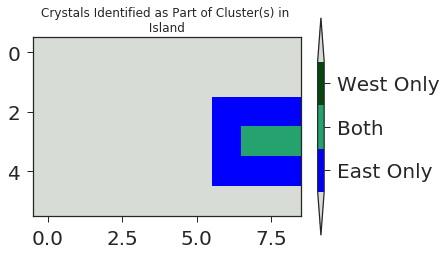

Unique island:  1636400282000020001100102
     Found another island with this unique ID. Adding their crystals together:
           [16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
           [16.0, 17.0, 25.0, 26.0, 34.0, 35.0, 16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
     Found Match ( 1014 0 1 )
         East:  [16.0, 17.0, 25.0, 26.0, 34.0, 35.0, 16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
         West:  [35.0, 25.0, 26.0, 34.0]


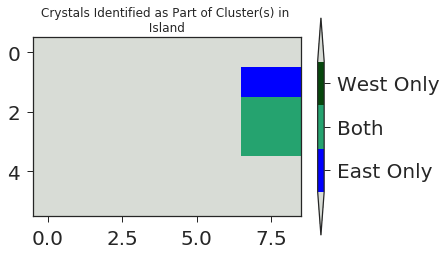

Unique island:  1636400282000020001100105
     Found another island with this unique ID. Adding their crystals together:
           [20.0, 21.0, 22.0, 29.0, 30.0, 31.0, 38.0, 39.0, 40.0]
           [20.0, 21.0, 22.0, 29.0, 30.0, 31.0, 38.0, 39.0, 40.0, 20.0, 21.0, 22.0, 29.0, 30.0, 31.0, 38.0, 39.0, 40.0]
     Found Match ( 1015 0 1 )
         East:  [20.0, 21.0, 22.0, 29.0, 30.0, 31.0, 38.0, 39.0, 40.0, 20.0, 21.0, 22.0, 29.0, 30.0, 31.0, 38.0, 39.0, 40.0]
         West:  [39.0, 30.0, 29.0, 38.0]


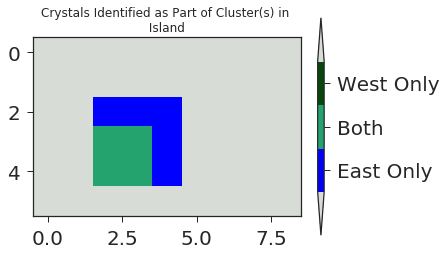

Unique island:  1636400282000020001100104
     Found another island with this unique ID. Adding their crystals together:
           [0.0, 1.0, 2.0, 9.0, 10.0, 11.0, 18.0, 19.0, 20.0]
           [0.0, 1.0, 2.0, 9.0, 10.0, 11.0, 18.0, 19.0, 20.0, 0.0, 1.0, 2.0, 9.0, 10.0, 11.0, 18.0, 19.0, 20.0]
     Found Match ( 1016 0 1 )
         East:  [0.0, 1.0, 2.0, 9.0, 10.0, 11.0, 18.0, 19.0, 20.0, 0.0, 1.0, 2.0, 9.0, 10.0, 11.0, 18.0, 19.0, 20.0]
         West:  [1.0, 10.0, 9.0, 0.0]


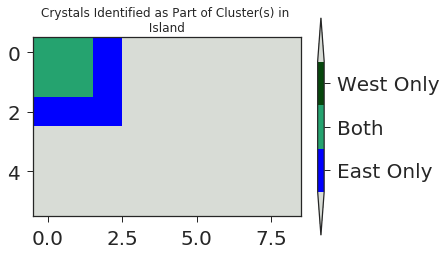

Unique island:  1636400282000020001100103
     Found another island with this unique ID. Adding their crystals together:
           [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
           [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
     Found Match ( 1017 0 1 )
         East:  [24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 42.0, 43.0, 44.0]
         West:  [24.0, 34.0, 33.0]


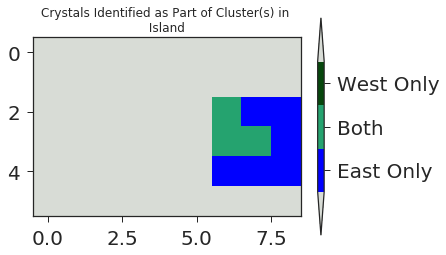

Unique island:  1636400282000020001100106
     Found another island with this unique ID. Adding their crystals together:
           [38.0, 39.0, 40.0, 47.0, 48.0, 49.0]
           [38.0, 39.0, 40.0, 47.0, 48.0, 49.0, 38.0, 39.0, 40.0, 47.0, 48.0, 49.0]
     Found Match ( 1018 0 1 )
         East:  [38.0, 39.0, 40.0, 47.0, 48.0, 49.0, 38.0, 39.0, 40.0, 47.0, 48.0, 49.0]
         West:  [46.0, 48.0, 47.0, 49.0]


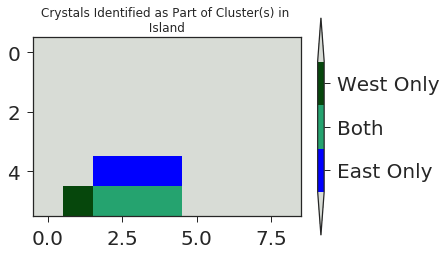

Unique island:  1636400282000020001100107
     Found another island with this unique ID. Adding their crystals together:
           [7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
           [7.0, 8.0, 16.0, 17.0, 25.0, 26.0, 7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
     Found Match ( 1019 0 1 )
         East:  [7.0, 8.0, 16.0, 17.0, 25.0, 26.0, 7.0, 8.0, 16.0, 17.0, 25.0, 26.0]
         West:  [26.0, 17.0, 8.0, 16.0]


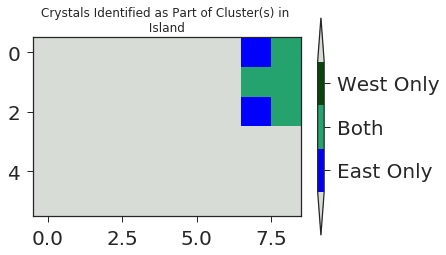

Unique island:  1636400282000020001100110
     Found another island with this unique ID. Adding their crystals together:
           [30.0, 31.0, 32.0, 39.0, 40.0, 41.0, 48.0, 49.0, 50.0]
           [30.0, 31.0, 32.0, 39.0, 40.0, 41.0, 48.0, 49.0, 50.0, 30.0, 31.0, 32.0, 39.0, 40.0, 41.0, 48.0, 49.0, 50.0]
     Found Match ( 1020 0 1 )
         East:  [30.0, 31.0, 32.0, 39.0, 40.0, 41.0, 48.0, 49.0, 50.0, 30.0, 31.0, 32.0, 39.0, 40.0, 41.0, 48.0, 49.0, 50.0]
         West:  [41.0, 40.0, 49.0, 50.0, 31.0, 32.0]


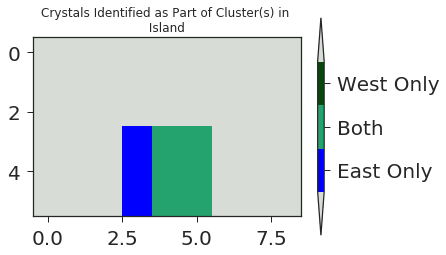

Unique island:  1636400282000020001100108
     Found another island with this unique ID. Adding their crystals together:
           [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
           [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0, 5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
     Found Match ( 1021 0 1 )
         East:  [5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0, 5.0, 6.0, 7.0, 14.0, 15.0, 16.0, 23.0, 24.0, 25.0]
         West:  [14.0, 16.0, 15.0]


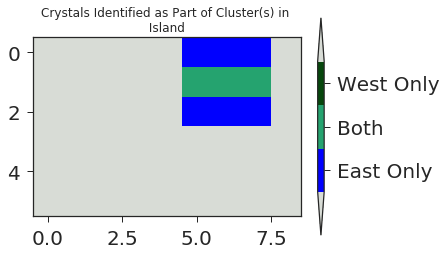

Unique island:  1636400282000020001100109
     Found another island with this unique ID. Adding their crystals together:
           [0.0, 1.0, 9.0, 10.0]
           [0.0, 1.0, 9.0, 10.0, 0.0, 1.0, 9.0, 10.0]
     Found Match ( 1022 0 1 )
         East:  [0.0, 1.0, 9.0, 10.0, 0.0, 1.0, 9.0, 10.0]
         West:  [0.0]


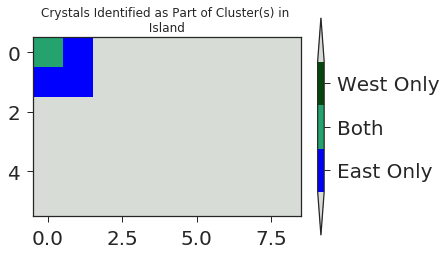

Unique island:  1636400282000020001100112
     Found another island with this unique ID. Adding their crystals together:
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
     Found Match ( 1023 0 1 )
         East:  [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
         West:  [33.0, 34.0, 35.0]


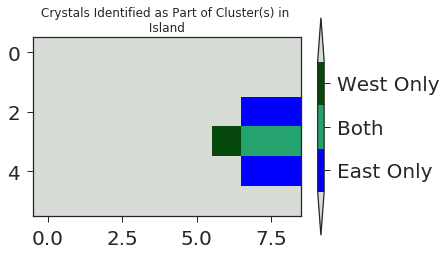

Unique island:  1636400282000020001100111
     Found another island with this unique ID. Adding their crystals together:
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
           [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
     Found Match ( 1024 0 1 )
         East:  [25.0, 26.0, 34.0, 35.0, 43.0, 44.0, 25.0, 26.0, 34.0, 35.0, 43.0, 44.0]
         West:  [35.0, 34.0]


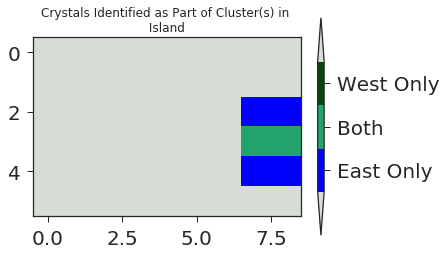

Unique island:  1636400282000020001200032
     Found another island with this unique ID. Adding their crystals together:
           [23.0, 24.0, 25.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
           [23.0, 24.0, 25.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0, 23.0, 24.0, 25.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
     Found Match ( 1025 0 1 )
         East:  [23.0, 24.0, 25.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0, 23.0, 24.0, 25.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0]
         West:  [33.0, 24.0, 25.0, 34.0, 23.0]


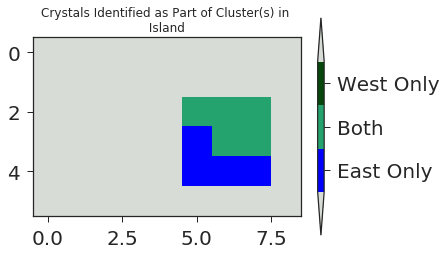

Unique island:  1636400282000020001200038
     Found another island with this unique ID. Adding their crystals together:
           [9.0, 10.0, 18.0, 19.0, 27.0, 28.0]
           [9.0, 10.0, 18.0, 19.0, 27.0, 28.0, 9.0, 10.0, 18.0, 19.0, 27.0, 28.0]
     Found Match ( 1026 0 1 )
         East:  [9.0, 10.0, 18.0, 19.0, 27.0, 28.0, 9.0, 10.0, 18.0, 19.0, 27.0, 28.0]
         West:  [18.0]


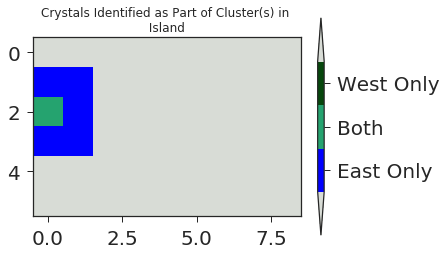

Unique island:  1636400282000020001200013
     Found another island with this unique ID. Adding their crystals together:
           [0.0, 1.0, 9.0, 10.0, 18.0, 19.0]
           [0.0, 1.0, 9.0, 10.0, 18.0, 19.0, 0.0, 1.0, 9.0, 10.0, 18.0, 19.0]
     Found Match ( 1027 0 1 )
         East:  [0.0, 1.0, 9.0, 10.0, 18.0, 19.0, 0.0, 1.0, 9.0, 10.0, 18.0, 19.0]
         West:  [9.0]


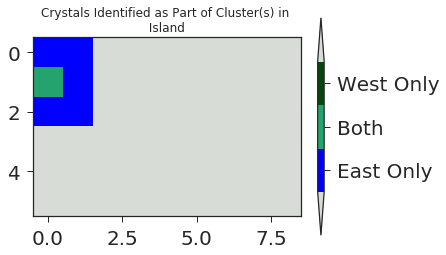

Unique island:  1636400282000020001200034
     Found another island with this unique ID. Adding their crystals together:
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
           [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
     Found Match ( 1028 0 1 )
         East:  [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
         West:  [24.0, 16.0, 25.0]


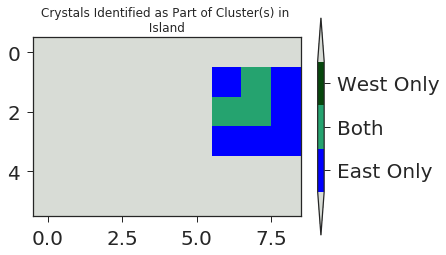

Unique island:  1636400282000020001200021
     Found another island with this unique ID. Adding their crystals together:
           [10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0]
           [10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0, 10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0]
     Found Match ( 1029 0 1 )
         East:  [10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0, 10.0, 11.0, 12.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0]
         West:  [20.0, 19.0, 18.0]


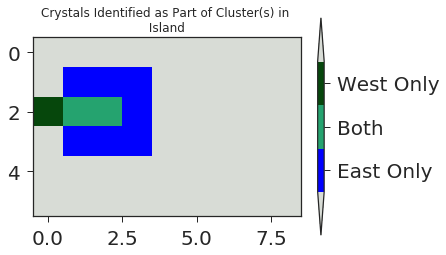

Unique island:  1636400282000020001200027
     Found another island with this unique ID. Adding their crystals together:
           [16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
           [16.0, 17.0, 25.0, 26.0, 34.0, 35.0, 16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
     Found Match ( 1030 0 1 )
         East:  [16.0, 17.0, 25.0, 26.0, 34.0, 35.0, 16.0, 17.0, 25.0, 26.0, 34.0, 35.0]
         West:  [8.0, 17.0, 26.0, 25.0]


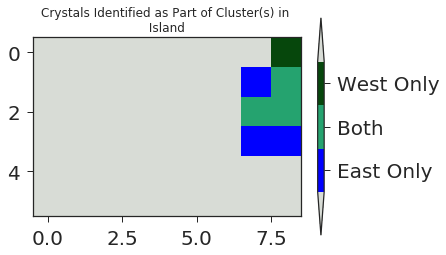

In [4]:
dingbefore = 0

for i, entry in enumerate(teast):
    
    if i < 1000:
        continue
    if i > 1030:
        break
    
    counter = 0
    ding = constructUniqueIDeast(entry)
    if (dingbefore == ding):
        continue
        
    print("Unique island: ", ding)
    
    crystalsEast = [x for x in entry.crystalsEast]
    fout = r.TFile("temp_tree_storage.root","recreate")
    
    teast_partial = teast.CopyTree( constructConditionFromUniqueIDEast(ding) )
    for k, entry3 in enumerate(teast_partial):
        dong = constructUniqueIDeast(entry3)
        if ding == dong:
            print("     Found another island with this unique ID. Adding their crystals together:")
            print("          ",crystalsEast)
            crystalsEast += [x for x in entry3.crystalsEast]
            print("          ",crystalsEast)
    
    crystalsWest = []
    twest_partial = twest.CopyTree( constructConditionFromUniqueIDWest(ding) )
    for j, entry2 in enumerate(twest_partial):
        dong = constructUniqueIDwest(entry2)
        if (ding == dong):
            counter = counter + 1
            print("     Found Match (", i, j, counter,")")
            print("         East: ", crystalsEast)
            print("         West: ", [x for x in entry2.crystalsWest])
            crystalsWest += [x for x in entry2.crystalsWest]
            
    imshowCompare( toMap(crystalsEast), toMap(crystalsWest), True, ding)

    dingbefore = ding

In [5]:
vecX = []

fout = r.TFile("temp_tree_storage.root","recreate")
tcomp_cut = tcomp.CopyTree( "TMath::Abs(deltaX) > 4" )

for i, entry in enumerate(tcomp_cut):
    print(constructUniqueID(entry))
    crystalsEast = entry.crystalsEast
    crystalsWest = entry.crystalsWest

    vecX.append( ([x for x in crystalsEast] , [x for x in crystalsWest]) )

1636400282000290000100186
1636400282000860000300180
1636400282000860002100118
1636400282001500002000161
1636400282001580000200103
1636400282001970000700162


In [6]:
print(len(vecX))
print(vecX)

6
[([7.0, 8.0, 16.0, 17.0], [8.0, 1.0]), ([27.0, 28.0, 36.0, 37.0, 45.0, 46.0], [44.0, 36.0]), ([27.0, 28.0, 36.0, 37.0, 45.0, 46.0], [42.0, 36.0, 44.0]), ([9.0, 10.0, 18.0, 19.0, 27.0, 28.0], [18.0, 44.0, 43.0]), ([9.0, 10.0, 18.0, 19.0, 27.0, 28.0], [26.0, 17.0, 18.0]), ([0.0, 1.0, 9.0, 10.0, 11.0, 12.0, 18.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0], [26.0, 9.0, 20.0, 11.0, 44.0])]


([7.0, 8.0, 16.0, 17.0], [8.0, 1.0])


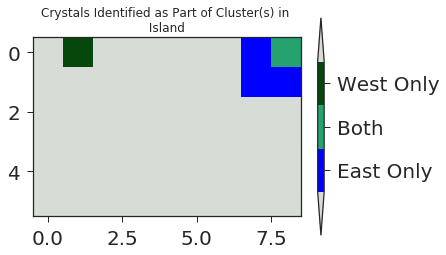

([27.0, 28.0, 36.0, 37.0, 45.0, 46.0], [44.0, 36.0])


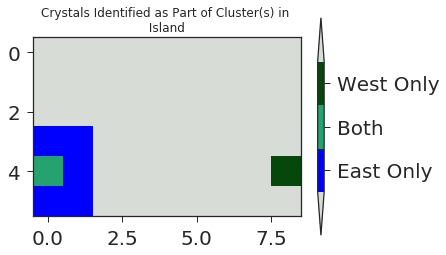

([27.0, 28.0, 36.0, 37.0, 45.0, 46.0], [42.0, 36.0, 44.0])


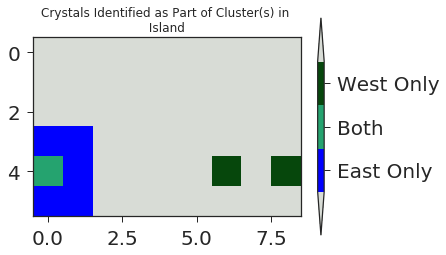

([9.0, 10.0, 18.0, 19.0, 27.0, 28.0], [18.0, 44.0, 43.0])


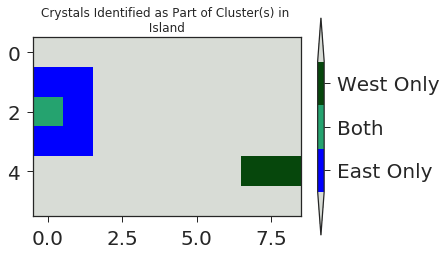

([9.0, 10.0, 18.0, 19.0, 27.0, 28.0], [26.0, 17.0, 18.0])


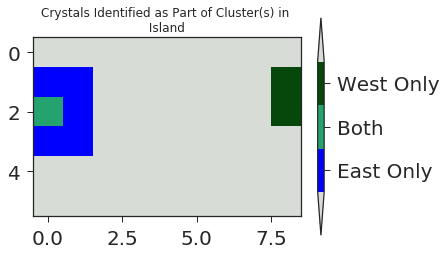

([0.0, 1.0, 9.0, 10.0, 11.0, 12.0, 18.0, 19.0, 20.0, 21.0, 28.0, 29.0, 30.0], [26.0, 9.0, 20.0, 11.0, 44.0])


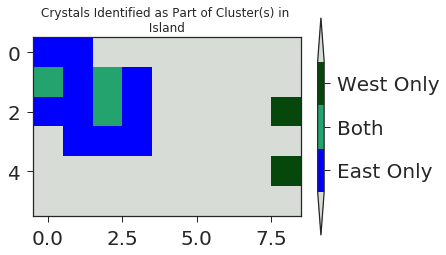

In [7]:
for entry in vecX:
    print(entry)
    cw = entry[1]
    ce = entry[0]
    
    imshowCompare( toMap(ce), toMap(cw), True, ding)

East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


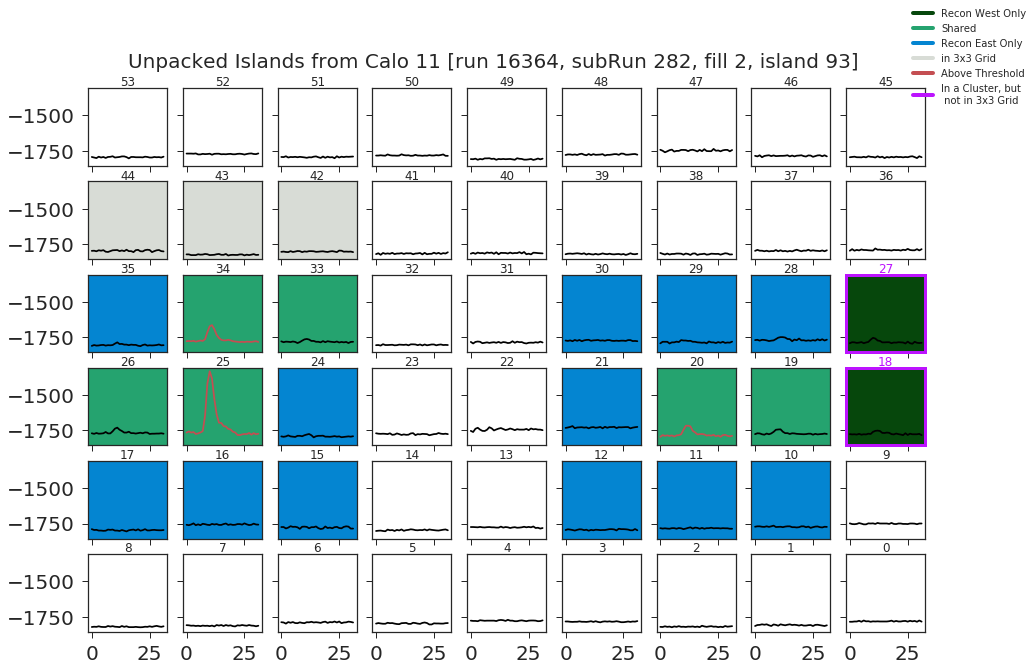

In [4]:
uniqueIDref = 1636400282000020001100093
islandPlot(uniqueIDref, teast, twest, twave, saveImage = True)

East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


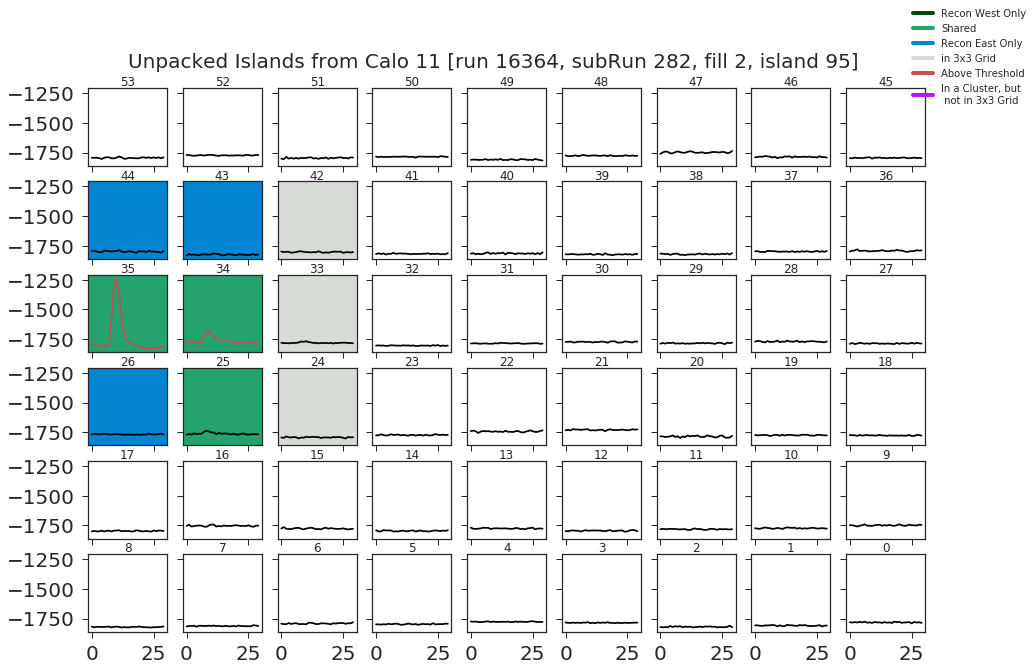

In [5]:
uniqueIDref = 1636400282000020001100095
islandPlot(uniqueIDref, teast, twest, twave, saveImage = True)

1636400282000390000800136 ( 1 )
East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0]]
Entry # 1


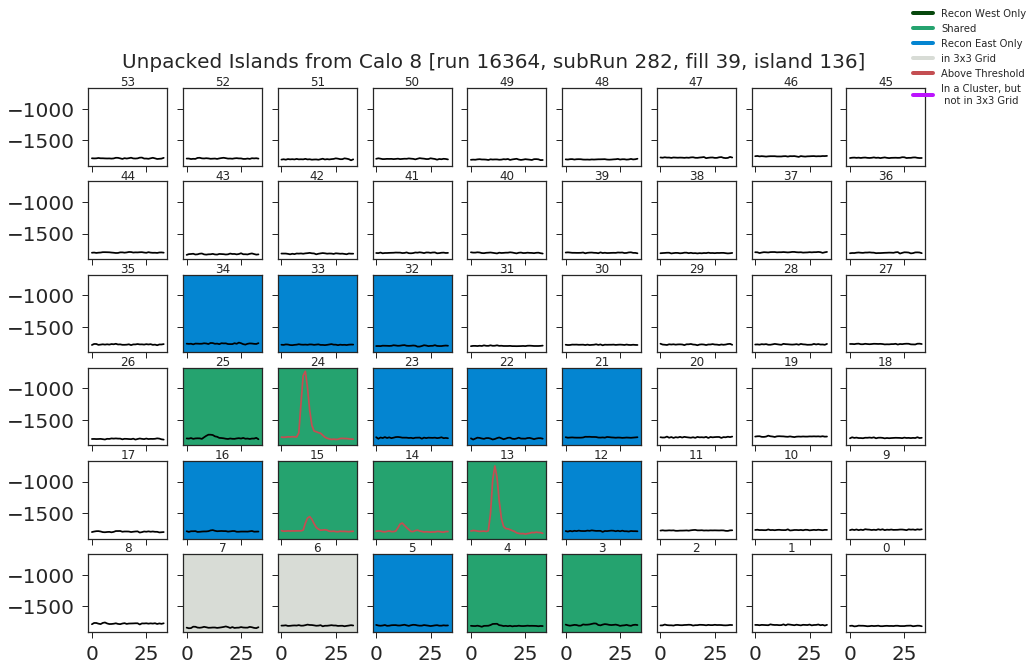

1636400282000440000800172 ( 2 )
East:  [[0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


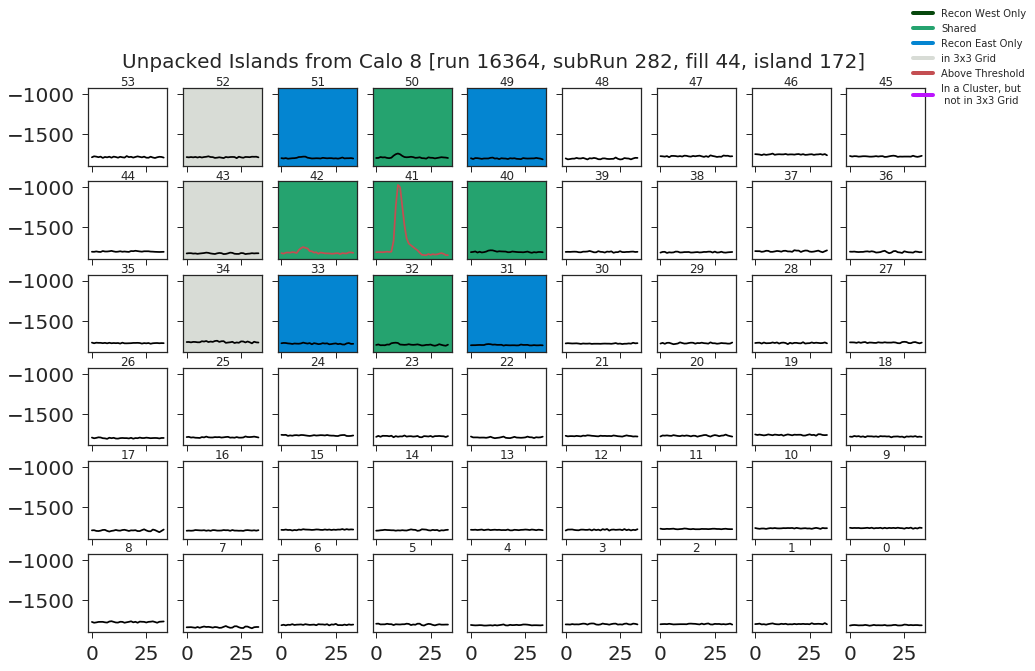

1636400282000560000600117 ( 3 )
East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


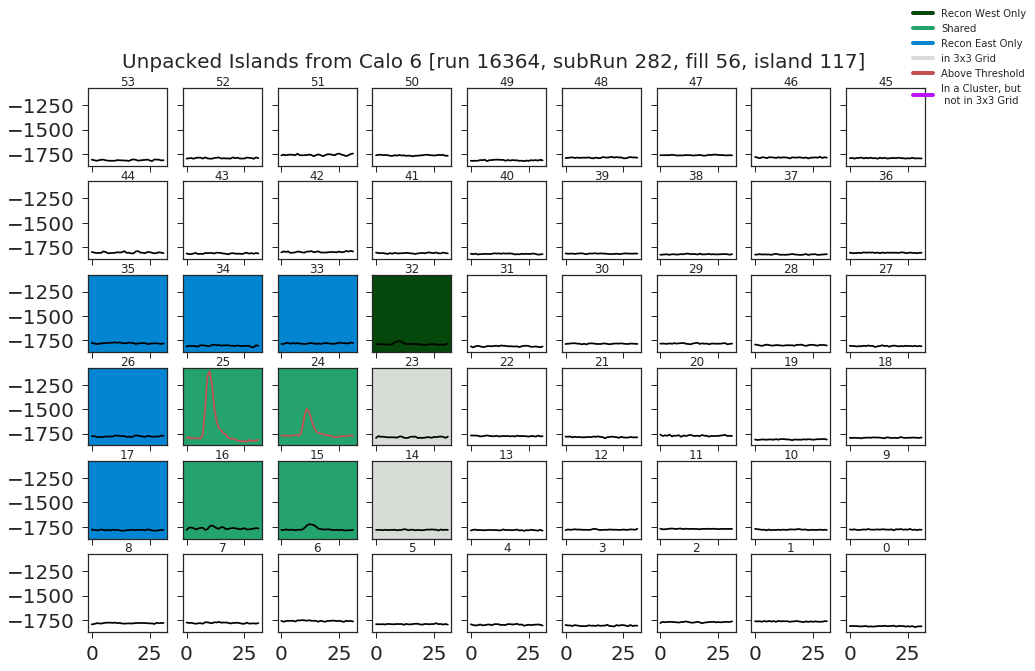

1636400282000690001100158 ( 4 )
East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


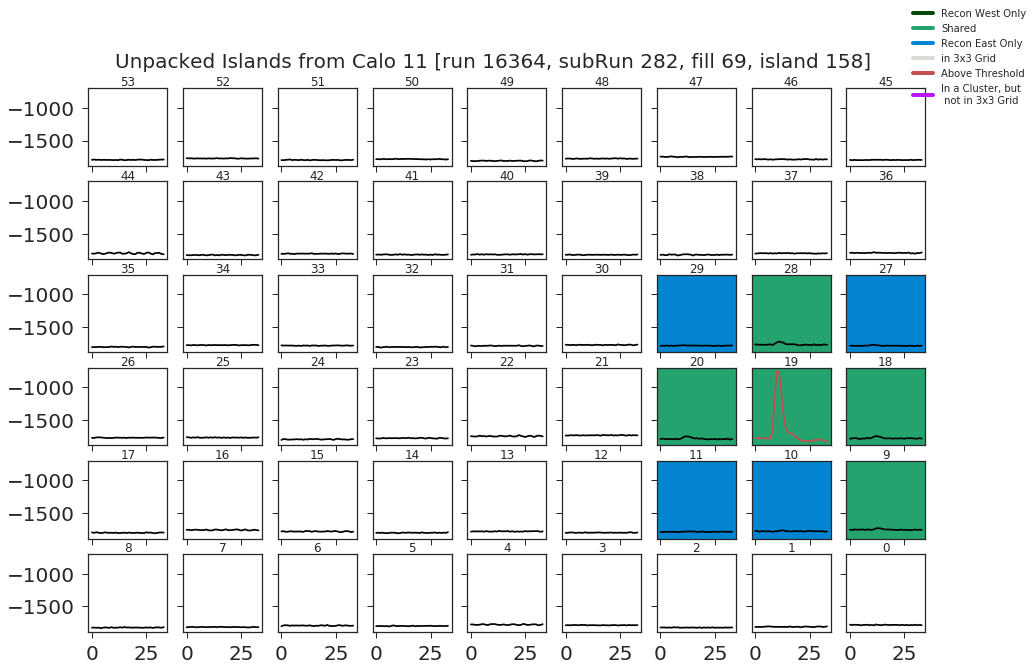

1636400282000730001100144 ( 5 )
East:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
West:  [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Entry # 1


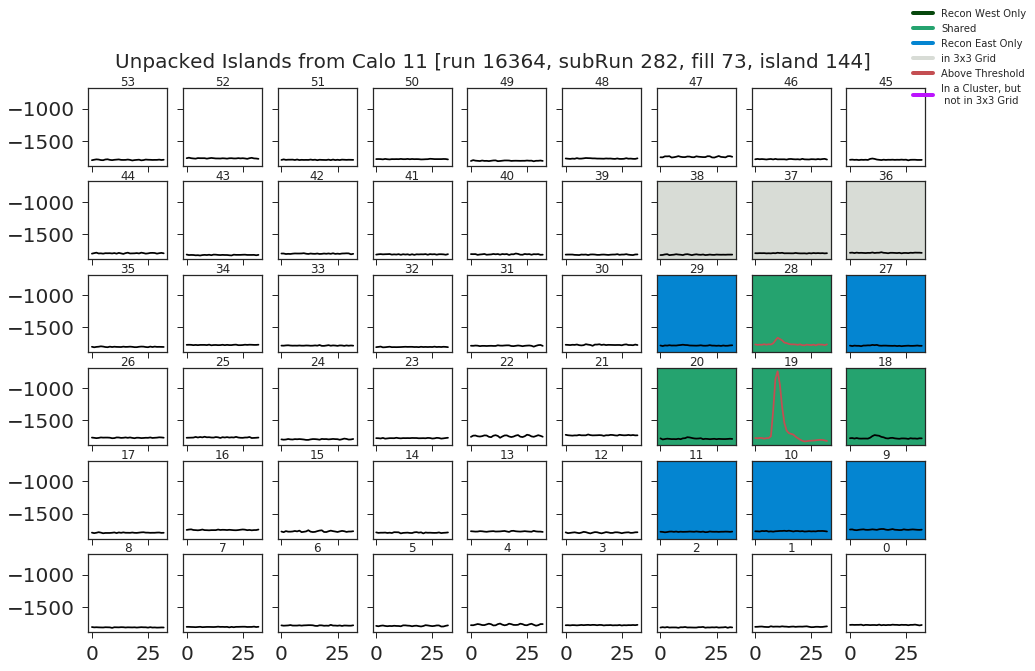

In [6]:
counter = 0

fout = r.TFile("temp_tree_storage.root","recreate")
tcomp_partial = tcomp.CopyTree( "TMath::Abs(deltaE) > 1700" )

for i, entry in enumerate(tcomp_partial):
    counter += 1
    if counter > 5:
        break
    print(constructUniqueID(entry), "(",counter,")")
    islandPlot(constructUniqueID(entry), teast, twest, twave, True)